In [203]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [204]:
# Cargar el dataset
data =  pd.read_csv (r'C:\Users\LENOVO\Documents\IA bootcamp ucamp\PROYECTOS FINALES\casas.csv')

In [205]:
# Se visualizan el tipo de datos para convertir de "categórica" a "numerica" 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Salario       201 non-null    int64 
 1   Hijos         201 non-null    int64 
 2   Departamento  201 non-null    object
 3   Valor_casa    201 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [206]:
#Se etiquetan la variable categórica (Departamento)
label_encoder = LabelEncoder()
data['Departamento'] = label_encoder.fit_transform(data['Departamento'])

In [207]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   Salario       201 non-null    int64
 1   Hijos         201 non-null    int64
 2   Departamento  201 non-null    int32
 3   Valor_casa    201 non-null    int64
dtypes: int32(1), int64(3)
memory usage: 5.6 KB


,Salario,Hijos,Departamento,Valor_casa
count,201.000000,201.000000,201.000000,2.010000e+02
mean,20496.517413,1.457711,0.527363,1.803434e+06
std,5114.199626,1.410480,0.500497,3.589321e+05
min,12200.000000,0.000000,0.000000,1.042300e+06
25%,16000.000000,0.000000,0.000000,1.523100e+06
50%,20400.000000,1.000000,1.000000,1.770800e+06
75%,24100.000000,2.000000,1.000000,2.058600e+06
max,29900.000000,5.000000,1.000000,2.844700e+06


In [208]:
#Definimos las variables en independientes (x) y dependiente u objetivo (y)
salario = data['Salario']
hijos = data['Hijos']
departamento = data['Departamento']
valor_casa = data['Valor_casa']

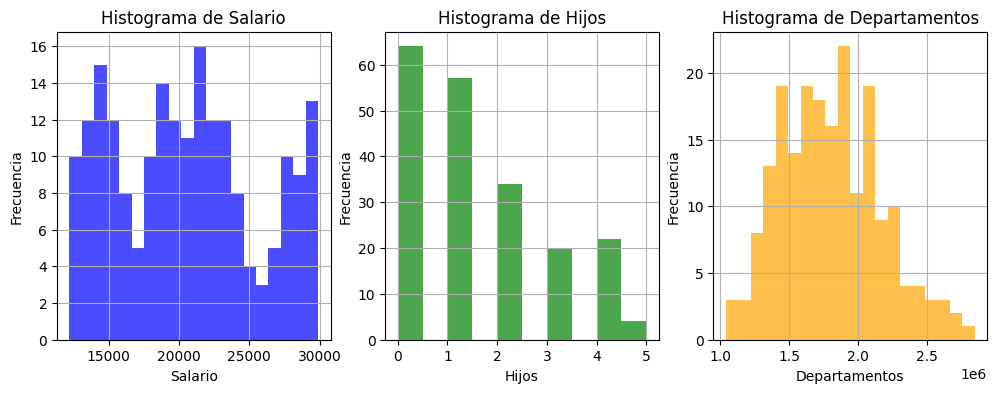

In [209]:
# Realizar análisis exploratorio de datos y gráficos
# Histogramas para las variables independientes
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(salario, bins=20, color='blue', alpha=0.7)
plt.grid()
plt.title('Histograma de Salario')
plt.xlabel('Salario')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 2)
plt.hist(hijos, bins=10, color='green', alpha=0.7)
plt.grid()
plt.title('Histograma de Hijos')
plt.xlabel('Hijos')
plt.ylabel('Frecuencia')

plt.subplot(1, 3, 3)
plt.hist(valor_casa, bins=20, color='orange', alpha=0.7)
plt.grid()
plt.title('Histograma de Departamentos')
plt.xlabel('Departamentos')
plt.ylabel('Frecuencia')

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


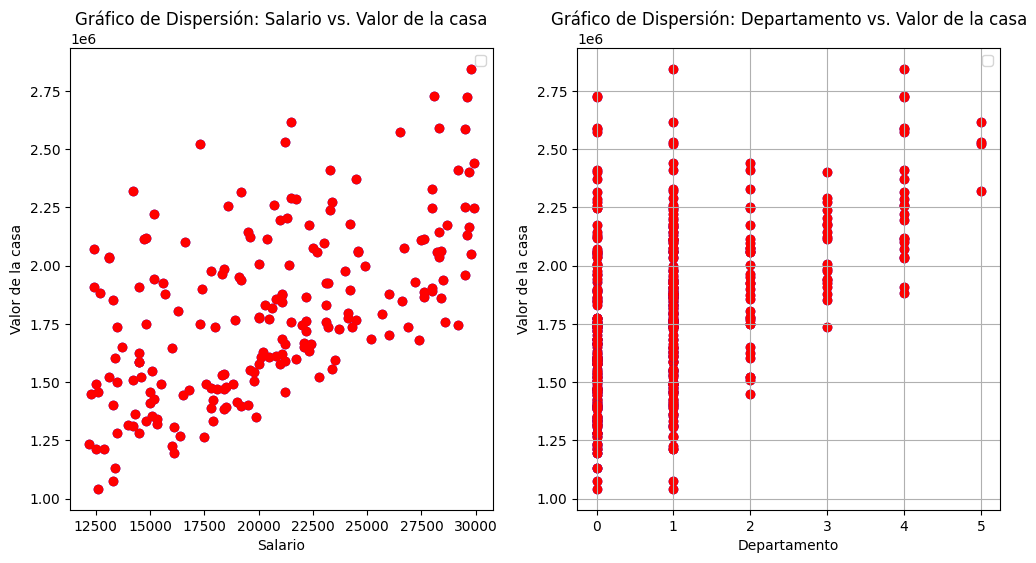

In [219]:
# Crea gráficos de dispersión para las variables independientes vs. la variable dependiente
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(data['Salario'], data['Valor_casa'], color='blue')
plt.scatter(data['Salario'], data['Valor_casa'], color='red')
plt.xlabel('Salario')
plt.ylabel('Valor de la casa')
plt.title('Gráfico de Dispersión: Salario vs. Valor de la casa')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data['Hijos'], data['Valor_casa'], color='blue')
plt.scatter(data['Hijos'], data['Valor_casa'], color='red')
plt.xlabel('Hijos')
plt.ylabel('Valor de la casa')
plt.title('Gráfico de Dispersión: Hijos vs. Valor de la casa')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(data['Departamento'], data['Valor_casa'], color='blue')
plt.scatter(data['Departamento'], data['Valor_casa'], color='red')
plt.xlabel('Departamento')
plt.ylabel('Valor de la casa')
plt.title('Gráfico de Dispersión: Departamento vs. Valor de la casa')
plt.legend()

plt.grid()
plt.show()

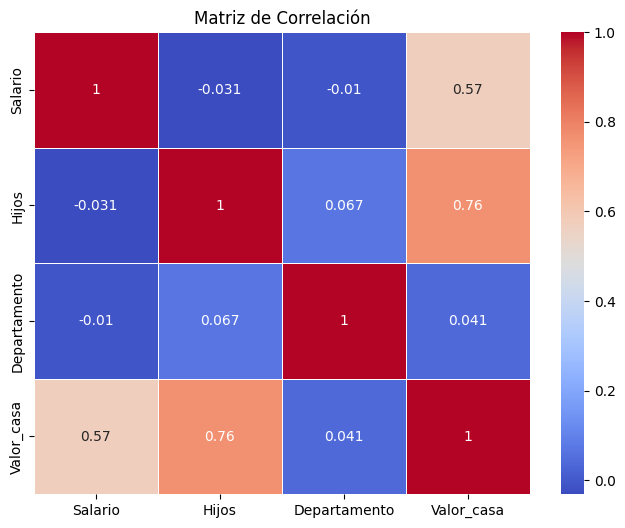

In [211]:
# Crear una matriz de correlación
correlation_matrix = data.corr()

# Generar un gráfico de la matriz de correlación
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

In [212]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X = data[['Salario', 'Hijos', 'Departamento']]
y = data['Valor_casa']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
# Entrenar el modelo de regresión lineal múltiple
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [214]:
# Evaluar el modelo
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [215]:
# Calcular métricas de desempeño
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Imprimir las métricas de desempeño
print(f"Error cuadrático medio (MSE) en conjunto de entrenamiento: {mse_train}")
print(f"Error cuadrático medio (MSE) en conjunto de prueba: {mse_test}")
print(f"Coeficiente de determinación (R^2) en conjunto de entrenamiento: {r2_train}")
print(f"Coeficiente de determinación (R^2) en conjunto de prueba: {r2_test}")

Error cuadrático medio (MSE) en conjunto de entrenamiento: 7367020374.547247
Error cuadrático medio (MSE) en conjunto de prueba: 9359255748.574518
Coeficiente de determinación (R^2) en conjunto de entrenamiento: 0.9447115467194079
Coeficiente de determinación (R^2) en conjunto de prueba: 0.9096284507362502


El Error Cuadrático Medio (MSE) en el conjunto de prueba es un 27.3% mayor (9359255748.57 vs. 7367020375).
El Coeficiente de Determinación (R^2) en el conjunto de prueba es un 3.5% menor (0.910 vs. 0.945).

El modelo muestra un mejor rendimiento en el conjunto de entrenamiento, con un MSE más bajo y un R^2 más alto en comparación con el conjunto de prueba. La diferencia es pequeña pero indica un ajuste más preciso en el entrenamiento. Sin embargo, el modelo aún explica razonablemente bien a los nuevos datos en el conjunto de prueba.

In [216]:
# Hacer predicciones para dos casos nuevos
caso_1 = np.array([17000, 3, 1]).reshape(1, -1)  # RR.HH
caso_2 = np.array([15400, 1, 0]).reshape(1, -1)  # IT

precio_pred_caso_1 = model.predict(caso_1)
precio_pred_caso_2 = model.predict(caso_2)

print(f"Predicción de precio para el primer caso (RR.HH): {precio_pred_caso_1[0]}")
print(f"Predicción de precio para el segundo caso (IT): {precio_pred_caso_2[0]}")

Predicción de precio para el primer caso (RR.HH): 1958152.4549429144
Predicción de precio para el segundo caso (IT): 1501179.1323278374
